In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 

from RamanFuncs import *
from scipy.optimize import curve_fit
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import savgol_filter

pwd = os.getcwd()

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 20

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:

def plot_raman(file_name):
    data = np.loadtxt(pwd + '/' + file_name + '.txt', delimiter = '\t')
    wave_number = data[:,0]
    counts = data[:,1]
    fig, ax = plt.subplots()
    ax.plot(wave_number, counts, color = 'black')
    ax.set_xlabel(r'Raman shift $\bf(cm^{-1})$', weight = 'bold' )
    ax.set_ylabel('Counts', weight = 'bold')
    return wave_number, counts


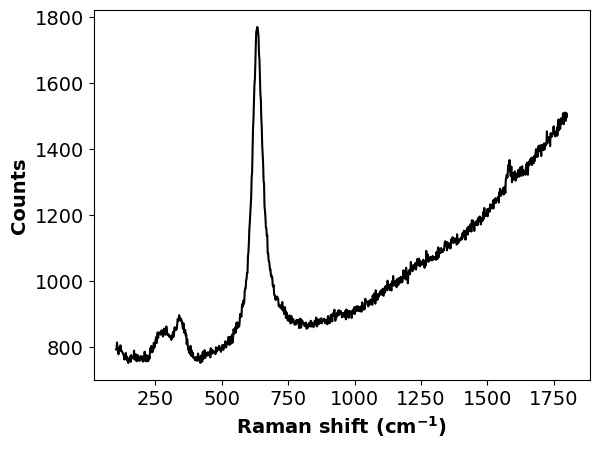

In [6]:
wave_number, counts = plot_raman('T9_4_532 nm_x100 vis_200_100%_5 s_10__01')

Text(0.5, 1.0, 'Polynomial Baseline Correction')

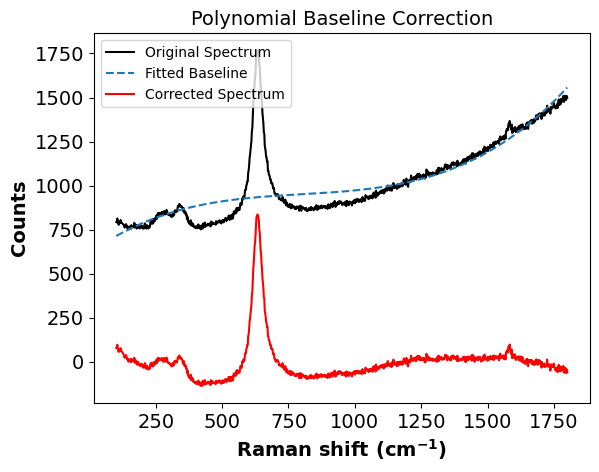

In [7]:
def polynomial_baseline_correction(x, y, deg=3, baseline_indices=None):
    """
    Perform polynomial baseline correction on a spectrum.

    Args:
        x (np.ndarray): Independent variable (e.g., wavelength).
        y (np.ndarray): Dependent variable (spectrum with baseline).
        deg (int, optional): Degree of the polynomial for baseline fitting. Defaults to 3.
        baseline_indices (np.ndarray, optional): Indices of the baseline regions. If None, use entire spectrum.

    Returns:
        tuple: (corrected_spectrum, fitted_baseline)
    """
    if baseline_indices is None:
        baseline_indices = np.arange(len(x))
    
    # Select baseline regions
    x_baseline = x[baseline_indices]
    y_baseline = y[baseline_indices]

    # Fit a polynomial to the baseline regions
    coeffs = np.polyfit(x_baseline, y_baseline, deg)
    baseline_poly = np.poly1d(coeffs)
    
    # Evaluate the polynomial on the entire x range
    fitted_baseline = baseline_poly(x)
    
    # Correct the spectrum
    corrected_spectrum = y - fitted_baseline
    
    return corrected_spectrum, fitted_baseline

corrected_spectrum, fitted_baseline = polynomial_baseline_correction(wave_number, counts)

# Plot the results

fig, ax = plt.subplots()
ax.plot(wave_number, counts, label='Original Spectrum', color = 'black')
ax.plot(wave_number, fitted_baseline, label='Fitted Baseline', linestyle='--')
ax.plot(wave_number, corrected_spectrum, label='Corrected Spectrum', color = 'red')
ax.legend()
ax.set_xlabel(r'Raman shift $\bf(cm^{-1})$', weight = 'bold' )
ax.set_ylabel('Counts', weight = 'bold')
plt.title('Polynomial Baseline Correction')


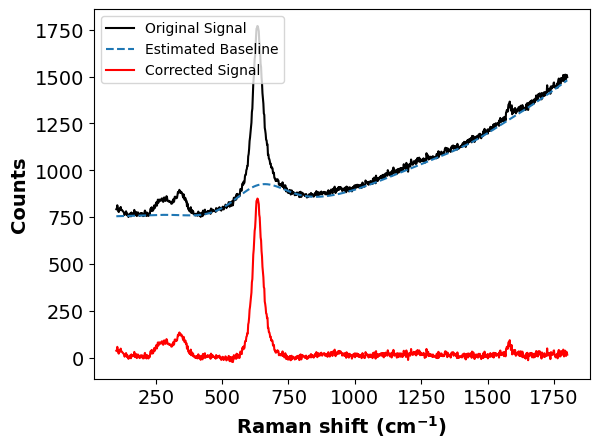

In [8]:
def asymmetric_least_squares_smoothing(y, lam=1e5, p=0.01, niter=10):
    """
    Perform Asymmetric Least Squares Smoothing to correct the baseline of a signal.

    Parameters:
    y (numpy.ndarray): The input signal (1D array).
    lam (float): The smoothing parameter. Larger values make the baseline smoother.
    p (float): The asymmetry parameter. Must be between 0 and 1.
    niter (int): The number of iterations to perform.

    Returns:
    numpy.ndarray: The estimated baseline of the signal.
    """
    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L-2))
    w = np.ones(L)
    
    for i in range(niter):
        W = sparse.diags(w, 0)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w * y)
        w = p * (y > z) + (1 - p) * (y < z)
    
    return z

baseline = asymmetric_least_squares_smoothing(counts)
corrected_signal = counts - baseline

# Plot the results
fig, ax = plt.subplots()
ax.plot(wave_number, counts, label='Original Signal', color = 'black')
ax.plot(wave_number, baseline, label='Estimated Baseline', linestyle='--')
ax.plot(wave_number, corrected_signal, label='Corrected Signal', color = 'red')
plt.legend()
ax.set_xlabel(r'Raman shift $\bf(cm^{-1})$', weight = 'bold' )
ax.set_ylabel('Counts', weight = 'bold')
plt.show()


### Savitzky-Golay filter

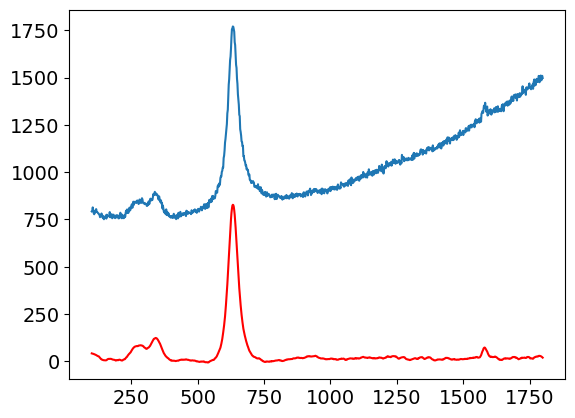

In [9]:
# Apply the Savitzky-Golay filter
window_length = 21  # Choose an odd number greater than the polynomial order
polyorder = 2       # Choose the order of the polynomial fit

y_smooth = savgol_filter(corrected_signal, window_length, polyorder)

plt.plot(wave_number, counts, label='Noisy signal')
plt.plot(wave_number, y_smooth, label='Smoothed signal', color='red')

In [5]:
from raman import main

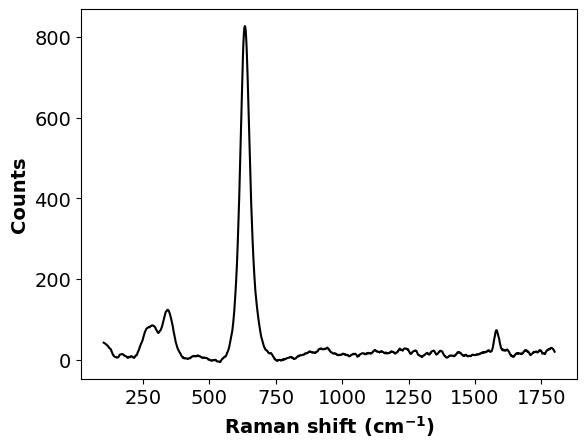

In [3]:
main('T9_4_532 nm_x100 vis_200_100%_5 s_10__01')

In [19]:
folder = '/Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/Data/Raman/23-09-2024/'
file_name = 'calib_obj5-1000-Y10b_532 nm_600 gr_mm_x100 vis_150_1%_5_20 s_600 gr_mm_01'

wave_number, counts = plot_raman(file_name)

FileNotFoundError: /Users/tiagopaiva/Library/CloudStorage/OneDrive-UniversidadedeLisboa/CORKCAP_2022.05187.PTDC/CorkCapPy/calib_obj5-1000-Y10b_532 nm_600 gr_mm_x100 vis_150_1%_5_20 s_600 gr_mm_01.txt not found.

In [13]:
main('CA_MnOx_5s_532 nm_600 gr_mm_x100 vis_150_1%_5_5 s_600 gr_mm_01')

IndexError: tuple index out of range